Mejor valor encontrado: 21.65923315955024


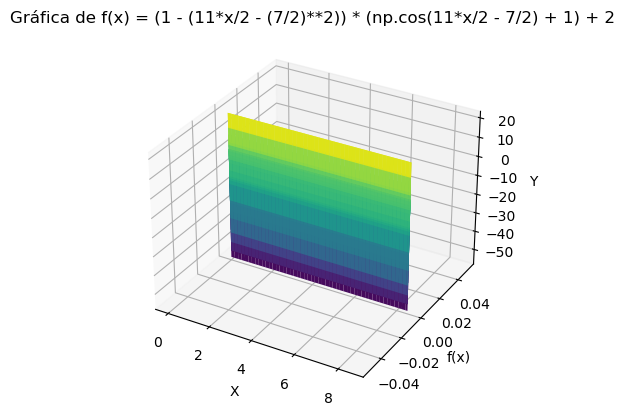

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función objetivo
def f(x):
   return (1 - (11*x/2 - (7/2)**2)) * (np.cos(11*x/2 - 7/2) + 1) + 2

# Definir los valores de los parámetros
Nind = 100  # Número de individuos en la población
Lind = 20  # Longitud de los individuos
Pc = 0.7 # Probabilidad de cruzamiento
Pm = 0.20  # Probabilidad de mutación
Maxgen = 100  # Máximo número de generaciones
Nvar = 2  # Número de variables
rango = np.array([[0,0.875], [0,0.875]])  # Rango de las variables

# Crear la población inicial
def creapob(Nind, Lind):
   return np.random.randint(0, 2, size=(Nind, Lind))

def decodifica(genotipo, rango):
    # Calcular Lind como 2^3 = 8
    Lind = 2 ** 3  # Lind = 8
    
    Nvar = rango.shape[1]
    Nind, _ = genotipo.shape
    Lvar = Lind // Nvar
    potencias = 2 ** np.arange(Lvar)
    fenotipo = np.zeros((Nind, Nvar))
    
    for i in range(Nind):
        for j in range(Nvar):
            fenotipo[i, j] = np.sum(potencias * genotipo[i, (j * Lvar):(j * Lvar + Lvar)])
    
    for i in range(Nvar):
        # Calcular Nind como 2^Lind
        Nind = 2 ** Lind  # Nind = 256
        
        fenotipo[:, i] = rango[i, 0] + ((rango[i, 1] - rango[i, 0]) / (2 ** Lvar - 1)) * fenotipo[:, i]
    
    return fenotipo

# Evaluar la función objetivo
def objfun(fenotipo):
   Nind, Nvar = fenotipo.shape
   objv = np.zeros((Nind, 1))
   for i in range(Nind):
       objv[i, 0] = f(fenotipo[i, 0])
   return objv

# Rankear la función de aptitud
def rankeo(objv, direccion):
   SP = 2
   Nind, Nobj = objv.shape
   aptitud = np.zeros((Nind, 1))
   if direccion == 1:
       nuevo_objv = np.sort(objv, axis=0)
   else:
       nuevo_objv = np.sort(-1 * objv, axis=0)
   apt = 2 - SP + 2 * (SP - 1) * (np.arange(Nind) / (Nind - 1))
   posori = np.argsort(nuevo_objv, axis=0)
   aptitud[posori, 0] = apt.reshape(-1, 1)
   return aptitud

# Selección por ruleta
def ruleta(genotipo, fenotipo, aptitud):
   Nind, aux = aptitud.shape
   total = np.sum(aptitud)
   probabilidad = aptitud / total
   acumulada = np.cumsum(probabilidad)
   idx = np.zeros((Nind, 1), dtype=int)
   for i in range(Nind):
       selecciona = np.random.rand()
       aux = np.where(acumulada >= selecciona)[0]
       idx[i, 0] = aux[0]
   nuevo_gen = genotipo[idx.flatten(), :]
   return nuevo_gen

# Cruza de un punto
def xunpunto(nuevo_gen, Pc):
   Nind, Lind = nuevo_gen.shape
   aux_gen = np.zeros((Nind, Lind))
   par = Nind % 2
   for i in range(0, Nind - 1, 2):
       cruza = np.random.rand()
       if cruza <= Pc:
           corte = np.random.randint(0, Lind - 1)
           aux_gen[i, :] = np.concatenate((nuevo_gen[i, :corte], nuevo_gen[i + 1, corte:]))
           aux_gen[i + 1, :] = np.concatenate((nuevo_gen[i + 1, :corte], nuevo_gen[i, corte:]))
       else:
           aux_gen[i, :] = nuevo_gen[i, :]
           aux_gen[i + 1, :] = nuevo_gen[i + 1, :]
   if par == 1:
       aux_gen[Nind - 1, :] = nuevo_gen[Nind - 1, :]
   nuevo_gen = aux_gen
   return nuevo_gen

# Mutación
def muta(nuevo_gen, Pm):
   Nind, Lind = nuevo_gen.shape
   valores = np.random.rand(Nind, Lind)
   muta = valores <= Pm
   nuevo_gen = np.logical_xor(nuevo_gen, muta)
   return nuevo_gen

# Inicializar población
genotipo = creapob(Nind, Lind)
fenotipo = decodifica(genotipo, rango)
generaciones = 1

# Obteniendo el valor óptimo
Mejor = np.full((Maxgen, 1), np.nan)  # Referencia al mejor valor óptimo encontrado de la función objetivo
Mejor_cromosoma = np.zeros((Maxgen, Lind))  # Mejor valor (nodo) encontrado por cada generación
objv = objfun(fenotipo)  # Evaluación de la función

# Ciclo Evolutivo
while generaciones < Maxgen:
   # Rankear la población
   aptitud = rankeo(objv, 1)

   # Selección de individuos
   nuevo_gen = ruleta(genotipo, fenotipo, aptitud)

   # Cruza
   nuevo_gen = xunpunto(nuevo_gen, Pc)

   # Mutación
   nuevo_gen = muta(nuevo_gen, Pm)

   # Decodificar y evaluar la nueva población
   nuevo_feno = decodifica(nuevo_gen, rango)
   nuevo_objv = objfun(nuevo_feno)

   # Reemplazar la población anterior
   genotipo = nuevo_gen
   objv = nuevo_objv

   # Almacenar las mejores soluciones de cada generación
   idx = np.argmax(objv)
   Mejor[generaciones] = objv[idx]
   Mejor_cromosoma[generaciones, :] = genotipo[idx, :]

   generaciones += 1

# Imprimir el mejor valor de todas las generaciones
print("Mejor valor encontrado:", np.nanmax(Mejor))
# Crear un arreglo de valores para x
x = np.linspace(0, 8.5, 100)

# Evaluar la función f(x) en los valores de x
y = f(x)

# Crear una malla para la superficie 3D
X, Y = np.meshgrid(x, y)

# Graficar la función en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, np.zeros_like(X), Y, cmap='viridis')  # Usar np.zeros_like(X) para el eje Y

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('f(x)')
ax.set_zlabel('Y')
ax.set_title('Gráfica de f(x) = (1 - (11*x/2 - (7/2)**2)) * (np.cos(11*x/2 - 7/2) + 1) + 2')

# Mostrar la gráfica
plt.show()